In [1]:
__author__ = "@Tssp"
__date__   = "23/01/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix5505_iy4993_iz50/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70300', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71035', '.71040', '.71045', '.71050', '.71055', '.71060', '.71065', '.71070', '.71075', '.71080', '.71085', '.71090', '.71095', '.71100', '.71105', '.71110', '.71115', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165', '.71170', '.71175', '.71180', '.71185', '.71190', '.71195', '.71200', '.71205', '.71210', '.71215', '.71220', '.71225', '.71230', '.71235', '.71240', '.71245', '.71250', '.71255', '.71260', '.71265', '.71270', '.71275', '.71280', '.71285', '.71290', '.71295', '.71300', '.71305', '.71310', '.71315', '.71320', '.71325', '.71330', '.71335', '.71340', '.71345', '.71350', '.71355', '.71360', '.71365', '.71370', '.71375', '.71380'

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
least_bound_pos = 1052

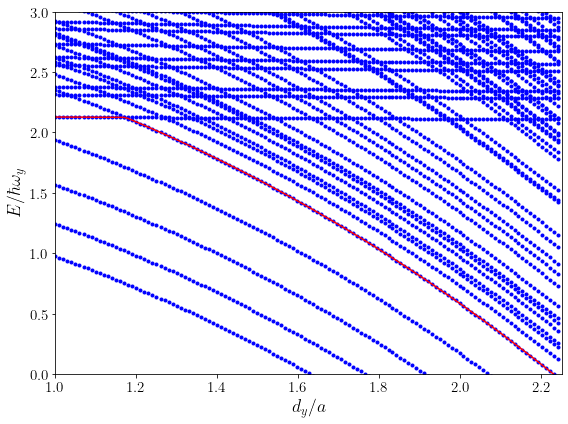

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_1056']/wy, 'r')
#ax.plot(x, dic['nivel_1000']/wy, 'r')
ax.set_ylim(0, 3)
ax.set_xlim(1, 2.25)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz50_400_Easc.png', dpi=200)
plt.show()

# Crosses

In [10]:
%matplotlib inline

## Resonance x>1

1069
1070
1071
1072
1073
1074
1075
1076
1077


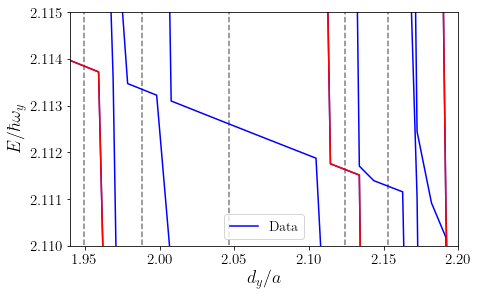

In [26]:
fig2, ax2 = plt.subplots(figsize=aursize)
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+17, least_bound_pos + 26):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1069']/wy, 'r')
ax2.plot(x, dic['nivel_1073']/wy, 'r')
ax2.plot(x, dic['nivel_1077']/wy, 'r')
ax2.vlines(x[30], 2.059, 2.115, alpha=0.5, linestyles='--')
ax2.vlines(x[26], 2.059, 2.115, alpha=0.5, linestyles='--')
ax2.vlines(x[20], 2.059, 2.115, alpha=0.5, linestyles='--')
ax2.vlines(x[12], 2.059, 2.115, alpha=0.5, linestyles='--')
ax2.vlines(x[9], 2.059, 2.115, alpha=0.5, linestyles='--')
ax2.set_ylim(2.11, 2.115)
ax2.set_xlim(1.94, 2.20)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [12]:
print('''f Eigenstates:
1069: trap
1070: (0,2,10)
1071: (0,0,18)
1072: (2,0,10)
1073: (0,4,0) ICIR
1074: (0,2,12)
1075: (0,4,2)
1076: (2,0,12)
1077: (4,0,0) ICIR
''')

f Eigenstates:
1069: trap
1070: (0,2,10)
1071: (0,0,18)
1072: (2,0,10)
1073: (0,4,0) ICIR
1074: (0,2,12)
1075: (0,4,2)
1076: (2,0,12)
1077: (4,0,0) ICIR



In [18]:
print(f'''To find the eigenstates:
x={x[30]}, delta=0{delta[30]}
x={x[26]}, delta=0{delta[26]}
x={x[20]}, delta=0{delta[20]}
x={x[12]}, delta=0{delta[12]}
x={x[9]}, delta=0{delta[9]}''')

To find the eigenstates:
x=1.9493339400101208, delta=0.70550
x=1.9882484836548557, delta=0.70530
x=2.0465192587369625, delta=0.70500
x=2.1240257882672524, delta=0.70460
x=2.1530356634114245, delta=0.70445


In [32]:
%matplotlib

Using matplotlib backend: MacOSX


In [33]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+17, least_bound_pos + 26):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.11, 2.115)
ax2.set_xlim(1.94, 2.2)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 30:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [34]:
%matplotlib inline

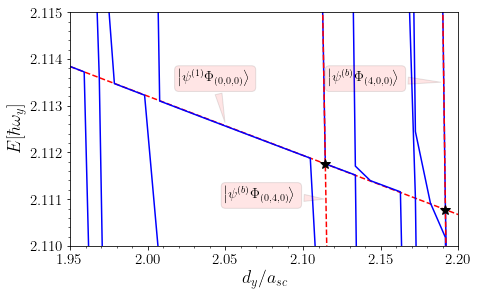

In [90]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1069:
f1069 = np.polyfit(xcoord, ycoord, deg=1)
x1069 = np.linspace(1.95, 2.2, num=40)
ax3.plot(x1069, np.polyval(f1069, x1069), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1069']/wy, 'b', label='Adiabatic')

# nivel 1070:
ax3.plot(x, dic['nivel_1070']/wy, 'b')

# nivel 1071:
ax3.plot(x, dic['nivel_1071']/wy, 'b')

# nivel 1072:
ax3.plot(x, dic['nivel_1072']/wy, 'b')

# nivel 1073:
ax3.plot(x, dic['nivel_1073']/wy, 'b')
f1073 = np.polyfit(x[(x < 2.12) & (x > 2.10)], np.array(dic['nivel_1073'])[(x < 2.12) & (x > 2.10)]/wy, deg=1)
x1073 = np.linspace(1.95, 2.2, num=200)
ax3.plot(x1073, np.polyval(f1073, x1073), 'r--', markersize=4)

# nivel 1074:
ax3.plot(x, dic['nivel_1074']/wy, 'b')

# nivel 1075:
ax3.plot(x, dic['nivel_1075']/wy, 'b')

# nivel 1076:
ax3.plot(x, dic['nivel_1076']/wy, 'b')

# nivel 1077:
ax3.plot(x, dic['nivel_1077']/wy, 'b')
f1077 = np.polyfit(x[(x < 2.2) & (x > 2.18)], np.array(dic['nivel_1077'])[(x < 2.2) & (x > 2.18)]/wy, deg=1)
x1077 = np.linspace(1.95, 2.2, num=200)
ax3.plot(x1077, np.polyval(f1077, x1077), 'r--', markersize=4)

# Crosses:
##########
ax3.plot(cross_points(f1069, f1073), np.polyval(f1069, cross_points(f1069, f1073)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1069, f1077), np.polyval(f1069, cross_points(f1069, f1077)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(2.05, 2.1126), xytext=(2.02, 2.1135), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,18)}\right>$', xy=(1.99, 2.061), xytext=(2, 2.061), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.19, 2.1135), xytext=(2.117, 2.1135), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(2.115, 2.111), xytext=(2.05, 2.111), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.75, 3.38), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.86, 3.349), xytext=(1.85, 3.33), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.11, 2.115)
ax3.set_xlim(1.95, 2.2)
#plt.tight_layout()
fig3.savefig('Results/Figures/Ix5505_Iy4993_Iz50_Easc_Interpolation_400_v2.png', bbox_inches="tight", dpi=200)

In [53]:
print(f'''Crosses between (x, E):
* 1069-1073: ({cross_points(f1069, f1073)}, {np.polyval(f1069, cross_points(f1069, f1073))})
* 1069-1077: ({cross_points(f1069, f1077)}, {np.polyval(f1069, cross_points(f1069, f1077))})
''')

Crosses between (x, E):
* 1069-1073: (2.1143498111493835, 2.111755714657031)
* 1069-1077: (2.191678941945585, 2.110776278334803)



In [54]:
print(f'''ICIR: asc/dy:
* 1069-1073: {1/cross_points(f1069, f1073)}
* 1069-1077: {1/cross_points(f1069, f1077)}
''')

ICIR: asc/dy:
* 1069-1073: 0.4729586347191949
* 1069-1077: 0.4562712087347454



In [27]:
#np.savetxt('Results/ICIR_positions_5505_4993_50.txt', 
#           [[1], [1/cross_points(f1004, f1007)], [np.polyval(f1004, cross_points(f1004, f1007))]], 
#           header='wx/wy, asc/dy, E/hwy', )